<a href="https://colab.research.google.com/github/SamG1002/PythonFiap/blob/main/1Checkpoint_2Semestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1-Checkpoint do Segundo Semestre**

Integrantes:

RM: 93100 - Nome: Guilherme Ferreira Lima

RM: 94393 - Nome: Breno Rodrigues Barbosa

RM: 94366 - Nome: Mateus Cadete Silva

RM: 96289 - Nome: SAMUEL GUERRA DE AQUINO

RM: 96136 - Nome: MARIANA DOMINGUES DE MORAES SOARES

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns 
from wordcloud import WordCloud

In [52]:
dados_atendimento  = pd.read_csv('dados_atendimentos.csv' , encoding = 'latin1', sep=',')

In [53]:
dados_renda = pd.read_csv('dados_renda_municipios_2010.csv' , encoding = 'latin1', sep=',')

In [54]:
dados_atendimento

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TEN..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,CE,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,229,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
996,997,AP,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:03,18/05/2021 18:02,368,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TEN..."
997,998,AM,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:57,78,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
998,999,ES,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,177,500,"""CLIENTE NAO CADASTRADO"""


1 – Quantos atendimentos ocorrem online e offline? (coluna: usuarioOnline).

In [55]:
dados_atendimento['usuarioOnline'].value_counts()

0    746
1    254
Name: usuarioOnline, dtype: int64

Offline = 746 Online = 254

2 – Quantos tipos de avaliação e quantas ocorreram em cada tipo? (coluna: avaliacao).

In [56]:
dados_atendimento['avaliacao'].value_counts()

negativa       510
positiva       251
n/ avaliado    239
Name: avaliacao, dtype: int64

Negativa = 510 
Positivo = 251
n/ avaliado = 239

3 – Quantos tipos de erros e quantas vezes foram observados cada tipo? (coluna: codigo).

In [57]:
dados_atendimento['codigo'].value_counts()

550    533
500    467
Name: codigo, dtype: int64

Há dois tipos de erro o 550 e o 500
Quantidade de erro = 533 e 467 

4 – Obter as medidas descritivas em relação ao tempo de acesso. (coluna: tempoAcesso).

In [58]:
dados_atendimento.groupby('state').agg(min_ta = pd.NamedAgg('tempoAcesso', 'min'),
mediana_ta = pd.NamedAgg('tempoAcesso', 'median'),
media_ta = pd.NamedAgg('tempoAcesso', 'mean'),
max_ta = pd.NamedAgg('tempoAcesso', 'max')).reset_index().sort_values('state', ascending = False)

,state,min_ta,mediana_ta,media_ta,max_ta
25,TO,60,265.5,274.970588,480
24,SP,17,224.0,238.723404,468
23,SE,29,209.5,225.000000,502
22,SC,40,208.5,225.421053,400
21,RS,40,251.0,265.705882,492
20,RR,4,237.0,248.351351,563
19,RO,17,233.0,231.209302,461
18,RN,33,258.0,242.621622,432
17,RJ,77,239.0,258.526316,549
16,PR,26,212.5,213.950000,535


5 – Obter as medidas descritivas em relação ao tempo de acesso por atendimentos ocorrem
online e offline. (colunas: tempoAcesso e usuarioOnline).

In [59]:
dados_atendimento.groupby('state').agg(min_ta = pd.NamedAgg('tempoAcesso', 'min'),
mediana_ta = pd.NamedAgg('tempoAcesso', 'median'),
media_ta = pd.NamedAgg('tempoAcesso', 'mean'),
max_ta = pd.NamedAgg('tempoAcesso', 'max')).reset_index().sort_values('state', ascending = False)

,state,min_ta,mediana_ta,media_ta,max_ta
25,TO,60,265.5,274.970588,480
24,SP,17,224.0,238.723404,468
23,SE,29,209.5,225.000000,502
22,SC,40,208.5,225.421053,400
21,RS,40,251.0,265.705882,492
20,RR,4,237.0,248.351351,563
19,RO,17,233.0,231.209302,461
18,RN,33,258.0,242.621622,432
17,RJ,77,239.0,258.526316,549
16,PR,26,212.5,213.950000,535


6 – Obter as medidas descritivas em relação aos tipos de avaliação. (colunas: tempoAcesso e
avaliacao).

In [60]:
dados_atendimento.groupby('avaliacao').agg(min_ta = pd.NamedAgg('tempoAcesso', 'min'),
mediana_ta = pd.NamedAgg('tempoAcesso', 'median'),
media_ta = pd.NamedAgg('tempoAcesso', 'mean'),
max_ta = pd.NamedAgg('tempoAcesso', 'max')).reset_index().sort_values('avaliacao', ascending = False)

,avaliacao,min_ta,mediana_ta,media_ta,max_ta
2,positiva,7,251.0,252.876494,562
1,negativa,4,243.5,246.870588,549
0,n/ avaliado,1,234.0,238.472803,629


7 – Obter as medidas descritivas em relação aos tipos de erros. (colunas: tempoAcesso e codigo).

In [61]:
dados_atendimento.groupby('codigo').agg(min_ta = pd.NamedAgg('tempoAcesso', 'min'),
mediana_ta = pd.NamedAgg('tempoAcesso', 'median'),
media_ta = pd.NamedAgg('tempoAcesso', 'mean'),
max_ta = pd.NamedAgg('tempoAcesso', 'max')).reset_index().sort_values('codigo', ascending = False)

,codigo,min_ta,mediana_ta,media_ta,max_ta
1,550,1,246.0,247.420263,563
0,500,4,237.0,245.173448,629


8 – Montar uma nuvem de palavras para as mensagens de erro. (coluna: erro).

In [62]:
texto_completo = " ".join(s for s in dados_atendimento['erro'])

In [63]:
wc = WordCloud()

wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

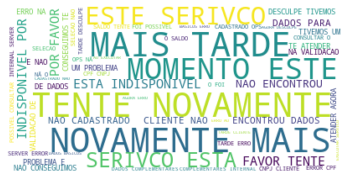

In [64]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

9 – Montar nuvem de palavras sobre as mensagens de erro para os tipos de avaliação dos
clientes. (colunas: erro e avaliacao)

In [65]:
texto_completo += " ".join(s for s in dados_atendimento['avaliacao'] )

In [66]:
wc = WordCloud()

wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

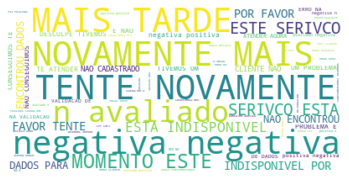

In [67]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

10 – Na tabela do censo de 2010, obter o índice de Gini por UF (state) (criar um dataframe como
df_gini_estado).

In [68]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
   
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [69]:
dados_renda

,state,city,RDPC
0,GO,Abadia de GoiÃ¡s/GO,574.96
1,MG,Abadia dos Dourados/MG,596.18
2,GO,AbadiÃ¢nia/GO,519.87
3,PA,Abaetetuba/PA,293.01
4,MG,AbaetÃ©/MG,707.24
...,...,...,...
5560,RS,Ãurea/RS,686.10
5561,PR,Ãngulo/PR,641.37
5562,BA,Ãrico Cardoso/BA,258.28
5563,PA,Ãbidos/PA,255.03


In [96]:
df_gini_estado = pd.DataFrame(dados_renda.groupby('state')['RDPC'].apply(gini))

In [101]:
df_gini_estado

,RDPC
state,
AC,0.195495
AL,0.140823
AM,0.180262
AP,0.177035
BA,0.160275
CE,0.132551
DF,0.000000
ES,0.153020
GO,0.138104


11 – Realizar o join das tabelas de atendimento e df_gini_estado.

In [120]:
df_gini_atendimentos = df_gini_estado.merge(dados_atendimento,  how='cross')
df_gini_atendimentos.rename(columns={'RDPC':'GINI'}, inplace=True)

12 – Obter as medidas descritivas em relação ao índice de gini por tipo de avaliação (colunas:
indice_gini e avaliacao). Esta análise é importante para conhecer se o banco realiza melhor
atendimento em estados de maior diferença social. Pode ser um problema para a imagem do
banco.

In [121]:
df_gini_atendimentos.groupby('state').agg(min_gini = pd.NamedAgg('GINI', 'min'),
mediana_gini = pd.NamedAgg('GINI', 'median'),
media_gini = pd.NamedAgg('GINI', 'mean'),
max_gini = pd.NamedAgg('GINI', 'max')).reset_index().sort_values('state')

,state,min_gini,mediana_gini,media_gini,max_gini
0,AC,0.0,0.149203,0.153529,0.24169
1,AL,0.0,0.149203,0.153529,0.24169
2,AM,0.0,0.149203,0.153529,0.24169
3,AP,0.0,0.149203,0.153529,0.24169
4,BA,0.0,0.149203,0.153529,0.24169
5,CE,0.0,0.149203,0.153529,0.24169
6,ES,0.0,0.149203,0.153529,0.24169
7,GO,0.0,0.149203,0.153529,0.24169
8,MA,0.0,0.149203,0.153529,0.24169
9,MG,0.0,0.149203,0.153529,0.24169


13 – Escreva um breve resumo das suas análises demonstrando os pontos mais relevantes



*Foram feitas análises precisas sobre o df_atendimentos e df_renda_municipio como identificações de erros, filtros, porcentagem e agrupamento de dados, nuvens de palvras relacionadas aos rescpectivos dados e união dos dois DFs para obter as métricas das respectivas questões.*